<a href="https://colab.research.google.com/github/jooyeongkang/kaggle-chest-x-ray-images-pneumonia/blob/master/ChestXRay_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import libraries

In [1]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [2]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from sklearn.metrics import f1_score
from PIL import Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load data

## Jooyeong's Path

In [4]:
# Train Data
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

## Jin's Path

In [5]:
"""# Train Data _Jin's data
dir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)
# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)"""

"# Train Data _Jin's data\ndir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'\ndir_dt_train = pathlib.Path(dir_dt_train)\n# Validation Data(merged to the train data due to the small amount of validation data)\n#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'\n#dir_dt_val = pathlib.Path(dir_dt_val)\n\n# Test Data\ndir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'\ndir_dt_test = pathlib.Path(dir_dt_test)"

In [6]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

"# Train Data\ndir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'\ndir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'\ndir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)\ndir_dt_train_normal = pathlib.Path(dir_dt_train_normal)\n\ndt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))\ndt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))\n\nimg_cnt_train_pneumonia = len(dt_train_pneumonia)\nimg_cnt_train_normal = len(dt_train_normal)\n\nprint('Training Data')\nprint('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))\n\n\n# Validation Data\ndir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'\ndir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'\ndir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)\ndir_dt_val_normal = pathlib.Path(dir_dt_val_normal)\n\ndt_val_pneumonia = list(dir_dt_val_

In [7]:
# Size of each image
"""for f in dir_dt_train.glob("PNEUMONIA/*.jpeg"):
  img = Image.open(f)
  print(img.size)"""

'for f in dir_dt_train.glob("PNEUMONIA/*.jpeg"):\n  img = Image.open(f)\n  print(img.size)'

# Create a dataset

## Define parameters

In [8]:
#batch_size = 32   # Number of Images in each batch
batch_size = 20   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

### Reference
**tf.keras.preprocessing.image_dataset_from_directory**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

### Original Data

In [9]:
"""dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training'
)"""

"dt_train = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_train,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123,\n    validation_split=.2,\n    subset='training'\n)"

In [10]:
"""dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation'
  )"""

"dt_val = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_train,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123,\n    validation_split=.2,\n    subset='validation'\n  )"

In [11]:
"""dt_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
  )"""

"dt_test = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_test,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123\n  )"

### Subset of Original Data
#### Train: 200 images
#### Validation: 100 images
#### Test: 624 images

In [12]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split= 1-(200/5232),
    subset='training')

Found 5232 files belonging to 2 classes.
Using 200 files for training.


In [13]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=100/5232,
    subset='validation')

Found 5232 files belonging to 2 classes.
Using 100 files for validation.


In [14]:
dt_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123)

Found 624 files belonging to 2 classes.


In [15]:
num_class = len(dt_train.class_names)

# Visualize the data

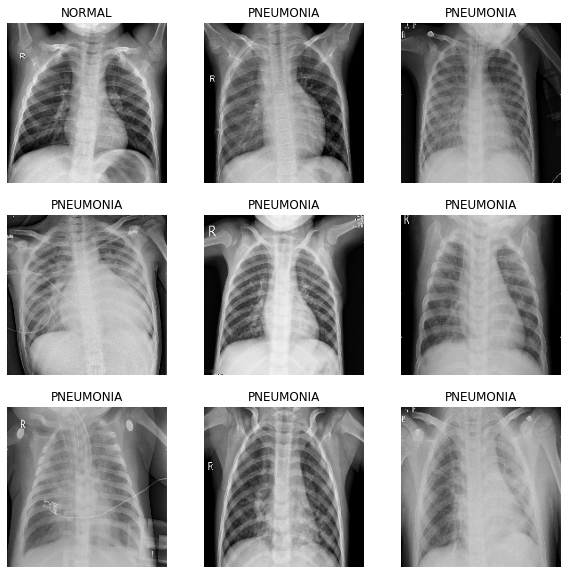

In [16]:
plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

## Check Data Structure

### Reference
**tf.data.Dataset**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [17]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 1)
(20,)


In [18]:
for image_batch, labels_batch in dt_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 1)
(20,)


## Examples of Data Augmentation

### RandomFlip

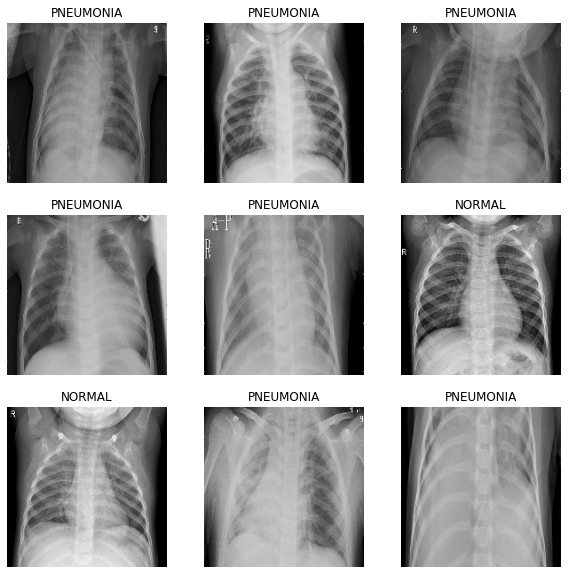

In [19]:
dt_augm_filp = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal")
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_filp(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomRotation

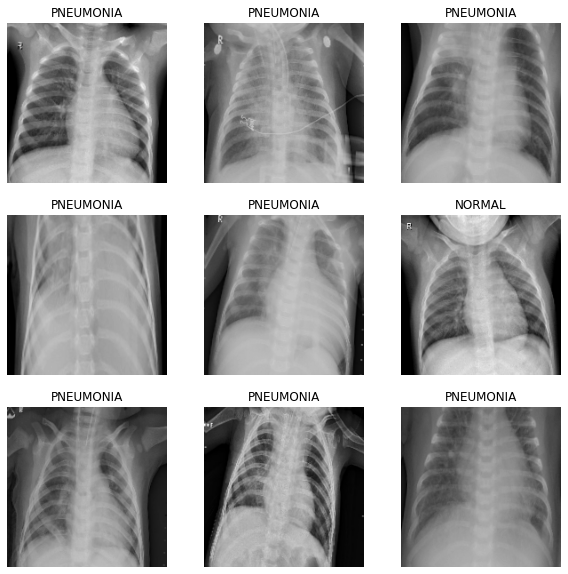

In [20]:
dt_augm_rotation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.01)
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_rotation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomZoom

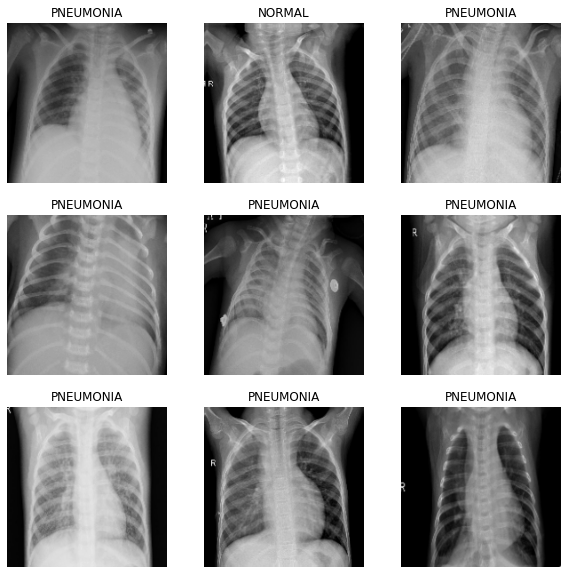

In [21]:
dt_augm_zoom = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.1)
])


plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_zoom(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for the better performance

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
"""# Before normalizing layer
image_batch, labels_batch = next(iter(dt_train))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

normalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) 
normalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))

# After nomarlizing layer
image_batch, labels_batch = next(iter(normalized_dt))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))"""

'# Before normalizing layer\nimage_batch, labels_batch = next(iter(dt_train))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))\n\nnormalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) \nnormalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))\n\n# After nomarlizing layer\nimage_batch, labels_batch = next(iter(normalized_dt))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))'

# Experimental Designs

## Define functions



1.   Non-Contrastive Learning
2.   Contrastive Learning

No Dropout & Data Augmentation (RandomFlip, RandomRotation, RandomZoom)

In [23]:
'''
Hyperparameters
'''
# Number of epochs
epochs = 100


def build_model(dt_train, dt_augms):

  model = Sequential()
  
  # It is also possible to normalize layer in the building block of the model                   
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # The first convolutional layer can typically have a large kernel, usually with a stride of 2
  #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
  if dt_augms == []:
    print('Non-Contrastive Learning')
    model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(img_height, img_width, 1)))
  else:
    print('Contrastive Learning')
    if dt_augms == {'randomflip'}:
      print('RandomFlip')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", seed=123, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomrotation'}:
      print('RandomRotation')
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, seed=123, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomzoom'}:
      print('RandomZoom')
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, seed=123, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomrotation'}:
      print('RandomFlip & RandomRotation')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", seed=123, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, seed=123, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomzoom'}:
      print('RandomFlip & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", seed=123, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, seed=123, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomrotation', 'randomzoom'}:
      print('RandomRotation & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, seed=123, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, seed=123, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomrotation', 'randomzoom'}:
      print('RandomFlip & RandomRotation & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", seed=123, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, seed=123, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, seed=123, input_shape=(img_height, img_width, 1)))

    model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'))
       
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(.5))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(.5))
  model.add(layers.Dense(num_class, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  
  return model


def train_model(model):
  
  # Callback to save the best model
  checkpoint_filepath = '/tmp/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)

  # Train the model
  history = model.fit(
      x=dt_train,
      validation_data=dt_val,
      epochs=epochs,
      callbacks=[model_checkpoint_callback])
  
  return history


def plot_evaluation(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(history.history['val_accuracy']))

  plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


def test_model():
  # Load the best model through all epochs from the file path
  optimized_model = tf.keras.models.load_model('/tmp/checkpoint')

  # Test and evaluate the model
  optimized_model.evaluate(dt_val, batch_size=batch_size)
  optimized_model.evaluate(dt_test, batch_size=batch_size)

## **Convolutional Neural Network(CNN): Non-Contrastive Learning Approach**

##### Build Model

In [24]:
dt_augms = []
model_cnn_non_contrastive = build_model(dt_train, dt_augms)
model_cnn_non_contrastive.summary()

Non-Contrastive Learning
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            

##### Train Model

In [25]:
history = train_model(model_cnn_non_contrastive)

Epoch 1/100
10/10 [==============================] - 4s 135ms/step - loss: 6.0435 - accuracy: 0.5838 - val_loss: 0.7714 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.9004 - accuracy: 0.6947 - val_loss: 0.6072 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6240 - accuracy: 0.7427 - val_loss: 0.5964 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5443 - accuracy: 0.7829 - val_loss: 0.5871 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5508 - accuracy: 0.7782 - val_loss: 0.5527 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5411 - accuracy: 0.7717 - val_loss: 0.4997 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4158 - accura

##### Plot Evaluation

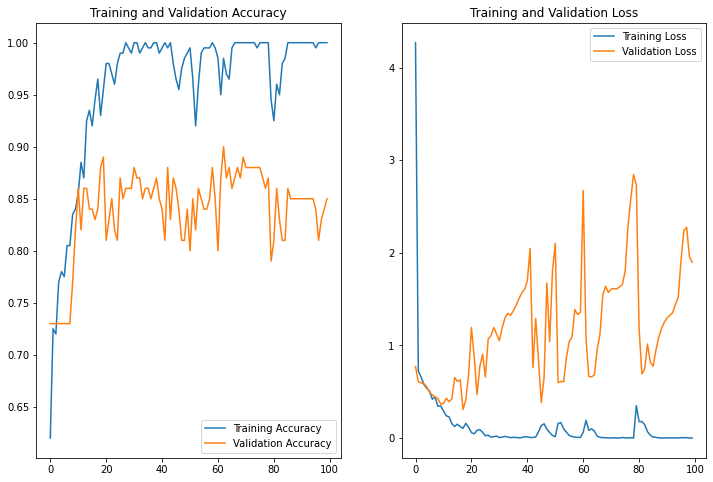

In [26]:
plot_evaluation(history)

##### Test Model

In [27]:
test_model()

32/32 [==============================] - 3s 71ms/step - loss: 3.1244 - accuracy: 0.7644


## **Convolutional Neural Network(CNN): Contrastive Learning Approach**

### 1.Apply one augmentation:

#### 1-1 RandomFlip

##### Build Model

In [28]:
dt_augms = {'randomflip'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPo

##### Train Model

In [29]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 6.2466 - accuracy: 0.6158 - val_loss: 0.9055 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0906 - accuracy: 0.6631 - val_loss: 0.5956 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6024 - accuracy: 0.7801 - val_loss: 0.5866 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6147 - accuracy: 0.7652 - val_loss: 0.5373 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5044 - accuracy: 0.7935 - val_loss: 0.4571 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3999 - accuracy: 0.8414 - val_loss: 0.4108 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3734 - accurac

##### Plot Evaluation

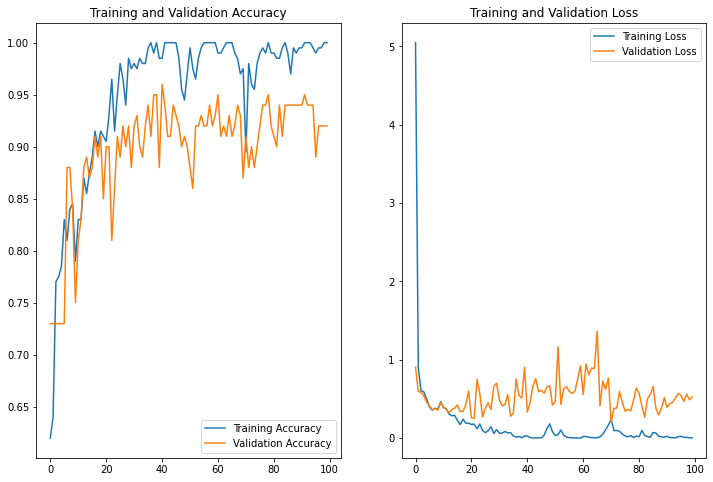

In [30]:
plot_evaluation(history)

##### Test Model

In [31]:
test_model()

32/32 [==============================] - 3s 70ms/step - loss: 1.4797 - accuracy: 0.8029


#### 1-2 RandomRotation

##### Build Model

In [32]:
dt_augms = {'randomrotation'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomRotation
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_1 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (

##### Train Model

In [33]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 6.3145 - accuracy: 0.6560 - val_loss: 0.7983 - val_accuracy: 0.2700
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.8735 - accuracy: 0.6293 - val_loss: 0.5704 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5731 - accuracy: 0.7793 - val_loss: 0.5833 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5079 - accuracy: 0.8026 - val_loss: 0.5589 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4557 - accuracy: 0.7956 - val_loss: 0.5584 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4675 - accuracy: 0.8081 - val_loss: 0.4783 - val_accuracy: 0.7700
INFO:tensorflow:Assets written t

##### Plot Evaluation

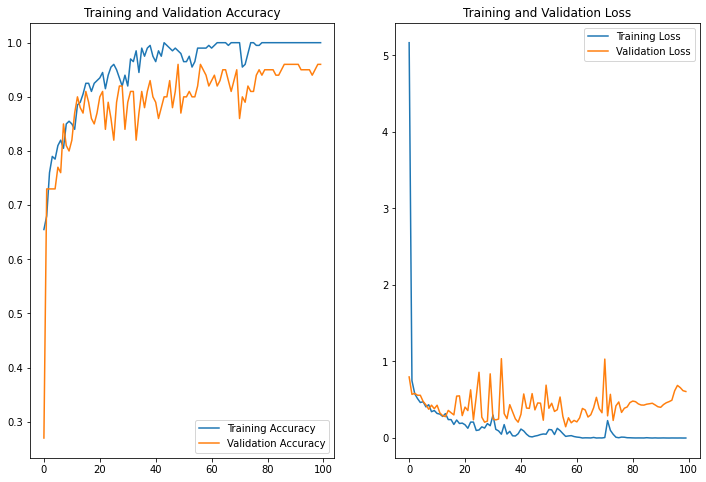

In [34]:
plot_evaluation(history)

##### Test Model

In [35]:
test_model()

32/32 [==============================] - 3s 71ms/step - loss: 1.3198 - accuracy: 0.8285


#### 1-3 RandomZoom 

##### Build Model

In [36]:
dt_augms = {'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomZoom
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_1 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxP

##### Train Model

In [37]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 7.4480 - accuracy: 0.5390 - val_loss: 0.6127 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6590 - accuracy: 0.6913 - val_loss: 0.6170 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6085 - accuracy: 0.7282 - val_loss: 0.6476 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5395 - accuracy: 0.7573 - val_loss: 0.6156 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5604 - accuracy: 0.7797 - val_loss: 0.5748 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5095 - accuracy: 0.8005 - val_loss: 0.5143 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5059 - accurac

##### Plot Evaluation

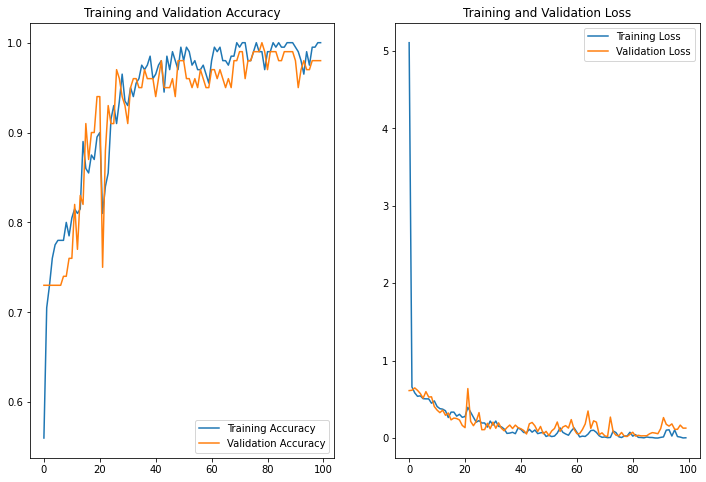

In [38]:
plot_evaluation(history)

##### Test Model


In [39]:
test_model()

32/32 [==============================] - 3s 70ms/step - loss: 2.2539 - accuracy: 0.7484


### 2.Apply two augmentations

#### 2-1 RandomFlip & RandomRotation

##### Build Model

In [40]:
dt_augms = {'randomflip', 'randomrotation'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomRotation
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_2 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2

##### Train Model

In [41]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 3.9118 - accuracy: 0.6368 - val_loss: 0.9131 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.9095 - accuracy: 0.6396 - val_loss: 0.6312 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5896 - accuracy: 0.7271 - val_loss: 0.5965 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5691 - accuracy: 0.7621 - val_loss: 0.5945 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5725 - accuracy: 0.7579 - val_loss: 0.5646 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5603 - accuracy: 0.7843 - val_loss: 0.5561 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5235 - accurac

##### Plot Evaluation

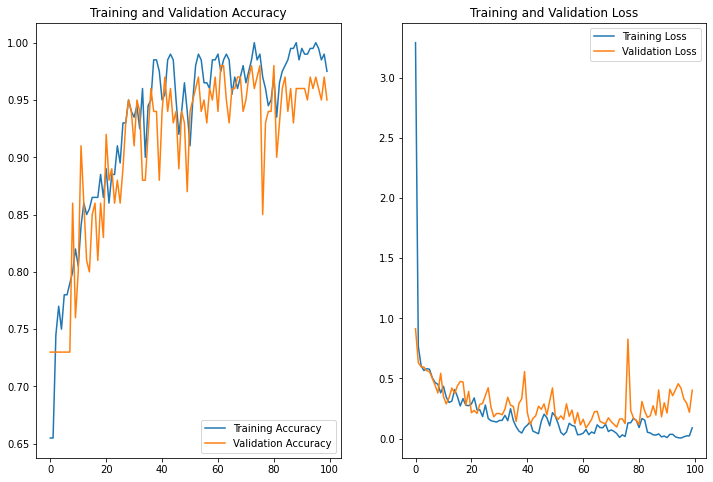

In [42]:
plot_evaluation(history)

##### Test Model

In [43]:
test_model()

32/32 [==============================] - 3s 70ms/step - loss: 1.3122 - accuracy: 0.7356


#### 2-2 RandomFlip & RandomZoom

##### Build Model

In [44]:
dt_augms = {'randomflip', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomZoom
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_3 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_27

##### Train Model

In [45]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 5.2194 - accuracy: 0.5441 - val_loss: 0.6870 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7639 - accuracy: 0.6185 - val_loss: 0.6191 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6610 - accuracy: 0.6902 - val_loss: 0.6020 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5610 - accuracy: 0.7842 - val_loss: 0.5916 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5742 - accuracy: 0.8022 - val_loss: 0.5665 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5146 - accuracy: 0.7961 - val_loss: 0.5881 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5482 - accurac

##### Plot Evaluation

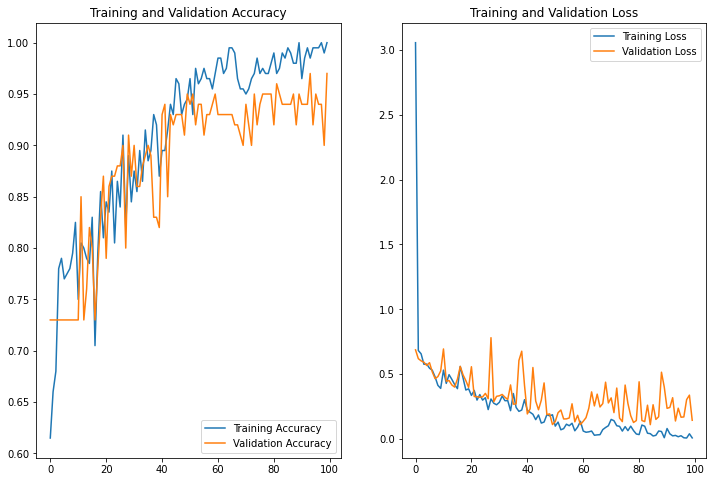

In [46]:
plot_evaluation(history)

##### Test Model

In [47]:
test_model()

32/32 [==============================] - 3s 71ms/step - loss: 1.1673 - accuracy: 0.7885


#### 2-3 RandomRotation & RotationZoom

##### Build Model

In [48]:
dt_augms = {'randomrotation', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomRotation & RandomZoom
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_3 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_3 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2

##### Train Model

In [49]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 6.1031 - accuracy: 0.6361 - val_loss: 0.5834 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.8080 - accuracy: 0.6483 - val_loss: 0.6218 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6245 - accuracy: 0.7584 - val_loss: 0.6158 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5332 - accuracy: 0.7746 - val_loss: 0.5571 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5140 - accuracy: 0.7764 - val_loss: 0.5352 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5016 - accuracy: 0.7717 - val_loss: 0.6658 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5389 - accurac

##### Plot Evaluation

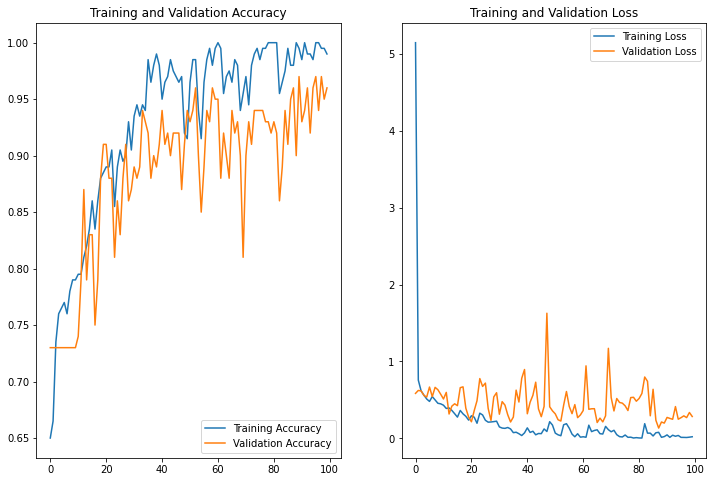

In [50]:
plot_evaluation(history)

##### Test Model

In [51]:
test_model()

32/32 [==============================] - 3s 70ms/step - loss: 1.8968 - accuracy: 0.8013


### 3.Apply all three augmentations

#### 3-1 RandomFlip, RandomRotation & RandomZoom

##### Build Model

In [52]:
dt_augms = {'randomflip', 'randomrotation', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomRotation & RandomZoom
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_4 (RandomFlip)   (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_4 (RandomZoom)   (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________

##### Train Model

In [53]:
history = train_model(model_cnn_contrastive)

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 3.5313 - accuracy: 0.6630 - val_loss: 0.7938 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7836 - accuracy: 0.7052 - val_loss: 0.6144 - val_accuracy: 0.7300
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5823 - accuracy: 0.7794 - val_loss: 0.6110 - val_accuracy: 0.7300
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5376 - accuracy: 0.7935 - val_loss: 0.5874 - val_accuracy: 0.7300
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5640 - accuracy: 0.7916 - val_loss: 0.5561 - val_accuracy: 0.7300
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5261 - accuracy: 0.7935 - val_loss: 0.5165 - val_accuracy: 0.7300
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4864 - accurac

##### Plot Evaluation

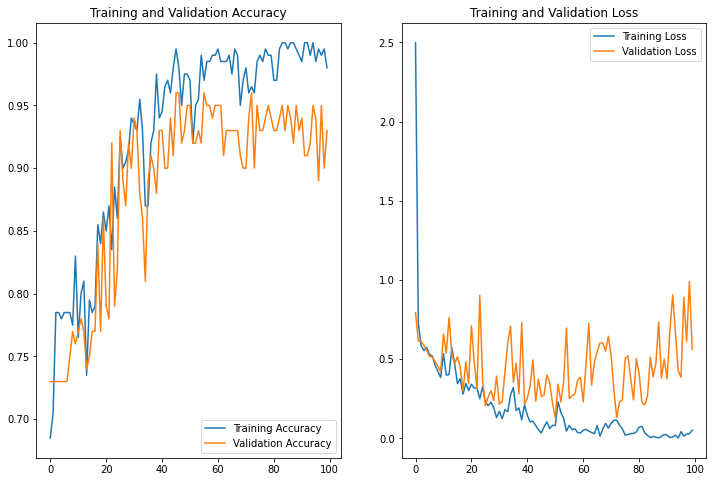

In [54]:
plot_evaluation(history)

##### Test Model

In [55]:
test_model()

32/32 [==============================] - 3s 72ms/step - loss: 1.7376 - accuracy: 0.7500
